In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Ensure inline plotting in Jupyter notebooks
%matplotlib inline


In [2]:
# Define transformation to convert images to tensor
transform = transforms.ToTensor()


In [3]:
# Define paths for dataset storage
data_path = 'C:\\Users\\venka\\DeepLearning'

# Load MNIST datasets with the specified transform
train_data_set = datasets.MNIST(root=data_path, train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root=data_path, train=False, download=True, transform=transform)


In [4]:
len(train_data_set)

60000

In [5]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\venka\DeepLearning
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
import torch
import numpy as np

def shuffle_labels(dataset):
    """
    Shuffle the labels of the given dataset.

    Parameters:
    - dataset (torch.utils.data.Dataset): The dataset with labels to shuffle.

    Returns:
    - None: Modifies the dataset in place.
    """
    # Generate random labels
    random_labels = torch.tensor(np.random.randint(0, 10, len(dataset)), dtype=torch.long)
    dataset.targets = random_labels

# Shuffle labels for training and test datasets
shuffle_labels(train_data_set)
shuffle_labels(test_data_set)


In [7]:
from torch.utils.data import DataLoader

def create_data_loader(dataset, batch_size=50, shuffle=True):
    """
    Create a DataLoader for the given dataset.

    Parameters:
    - dataset (torch.utils.data.Dataset): The dataset to load.
    - batch_size (int): Number of samples per batch. Default is 50.
    - shuffle (bool): Whether to shuffle the data. Default is True.

    Returns:
    - DataLoader: A DataLoader instance for the dataset.
    """
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Create DataLoaders for training and testing
train_loader = create_data_loader(train_data_set)
test_loader = create_data_loader(test_data_set)


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DNModel(nn.Module):
    def __init__(self, input_size=784, hidden1=120, hidden2=120, hidden3=16, output_size=10):
        """
        Initializes the Deep Neural Model with three hidden layers.

        Parameters:
        - input_size (int): Size of the input layer (default: 784).
        - hidden1 (int): Size of the first hidden layer (default: 120).
        - hidden2 (int): Size of the second hidden layer (default: 120).
        - hidden3 (int): Size of the third hidden layer (default: 16).
        - output_size (int): Size of the output layer (default: 10).
        """
        super(DNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)    
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.output_layer = nn.Linear(hidden3, output_size)
        
    def forward(self, x):
        """
        Defines the forward pass of the model.

        Parameters:
        - x (Tensor): Input tensor.

        Returns:
        - Tensor: Output after passing through the network.
        """
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output_layer(x)
        return x


In [10]:
dn_model = DNModel(input_size=784, hidden1=120, hidden2=120, hidden3=16, output_size=10)
dn_model

DNModel(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=16, bias=True)
  (output_layer): Linear(in_features=16, out_features=10, bias=True)
)

In [11]:
criterion_loss = nn.CrossEntropyLoss()


In [12]:
optimizer = torch.optim.Adam(dn_model.parameters(), lr=0.001)


In [13]:
epochs = 30
train_losses = []
test_losses = []

for epoch in range(epochs):
    
    # Training the batches
    for batch_idx, (X_train, y_train) in enumerate(train_loader):
        
        # Apply the model (flatten the input)
        y_pred = dn_model(X_train.view(X_train.size(0), -1))  # Flatten X_train dynamically based on batch size
        loss = criterion_loss(y_pred, y_train)
 
        # Update the parameters
        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Backpropagation
        optimizer.step()       # Optimizer step to update weights
     
    # Append train loss for the epoch
    train_losses.append(loss.item())  # Store scalar value of the loss
    
    # Testing the batches
    with torch.no_grad():  # No need to track gradients for validation
        for batch_idx, (X_test, y_test) in enumerate(test_loader):
            
            # Apply the model (flatten the input)
            y_val = dn_model(X_test.view(X_test.size(0), -1))
    
    # Append test loss for the epoch
    test_loss = criterion_loss(y_val, y_test)
    test_losses.append(test_loss.item())  # Store scalar value of the loss


In [15]:
train_losses = torch.stack([torch.tensor(loss) for loss in train_losses])  # Convert the list of scalar values to a tensor
test_losses = torch.stack([torch.tensor(loss) for loss in test_losses])    # Convert the list of scalar values to a tensor


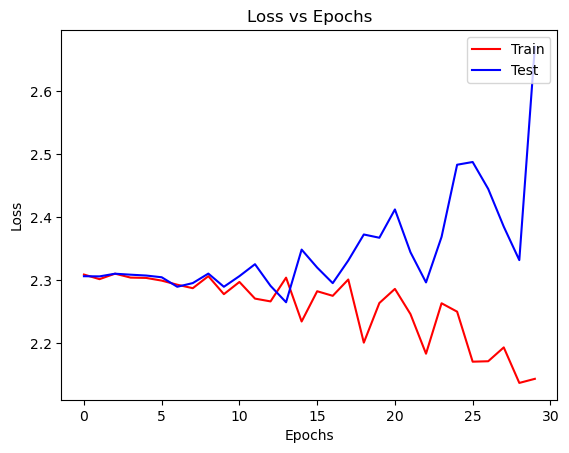

In [16]:
# Visualize losses for the MNIST dataset
plt.plot(range(epochs), train_losses.detach().cpu().numpy(), 'r', label='Train')  # Convert tensor to numpy for plotting
plt.plot(range(epochs), test_losses.detach().cpu().numpy(), 'b', label='Test')    # Convert tensor to numpy for plotting
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()
